In [1]:
import pandas as pd
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("qcew-2020-2022.csv")

In [3]:
print("Shape of the DataFrame:", df.shape)

df.info()
df.head()

Shape of the DataFrame: (798464, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798464 entries, 0 to 798463
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Area Type                   798464 non-null  object 
 1   Area Name                   798464 non-null  object 
 2   Year                        798464 non-null  int64  
 3   Time Period                 798464 non-null  object 
 4   Ownership                   798464 non-null  object 
 5   NAICS Level                 798464 non-null  int64  
 6   NAICS Code                  798464 non-null  object 
 7   Industry Name               798464 non-null  object 
 8   Establishments              798464 non-null  int64  
 9   Average Monthly Employment  798464 non-null  int64  
 10  1st Month Emp               798464 non-null  int64  
 11  2nd Month Emp               798464 non-null  int64  
 12  3rd Month Emp               798464 

,Area Type,Area Name,Year,Time Period,Ownership,NAICS Level,NAICS Code,Industry Name,Establishments,Average Monthly Employment,1st Month Emp,2nd Month Emp,3rd Month Emp,Total Wages (All Workers),Average Weekly Wages
0,County,Alameda County,2020,1st Qtr,Federal Government,2,1024,Professional and Business Services,2,9,9,9,9,279730.0,2391
1,County,Alameda County,2020,1st Qtr,Federal Government,3,491,Postal Service,28,3189,3198,3181,3189,54692130.0,1319
2,County,Alameda County,2020,1st Qtr,Federal Government,3,541,Professional and Technical Services,2,9,9,9,9,279730.0,2391
3,County,Alameda County,2020,1st Qtr,Federal Government,5,54133,Engineering Services,1,2,2,2,2,31831.0,1224
4,County,Alameda County,2020,1st Qtr,Federal Government,2,62,Health Care and Social Assistance,1,376,384,376,369,8804659.0,1800


In [4]:
# identify constants
import pandas as pd
constants = [ x for x in df.columns if len(df[x].fillna(0).unique()) == 1 ]
print(f"constants are: {constants}")

constants are: []


In [5]:
# identify quasi constant values (sometimes these may be boolean features)
import pandas as pd
threshold = 0.98

# Identify quasi-constant columns
quasi_constant_columns = []

for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)
    dominant_frequency = value_counts.max()
    if dominant_frequency >= threshold:
        quasi_constant_columns.append(column)

# Print the quasi-constant columns
print("Quasi-constant columns:")
for column in quasi_constant_columns:
    print(f"Column '{column}' is quasi-constant.")


Quasi-constant columns:


In [6]:
# identify duplicate rows
import pandas as pd

duplicate_rows = df[df.duplicated()]
duplicate_rows

,Area Type,Area Name,Year,Time Period,Ownership,NAICS Level,NAICS Code,Industry Name,Establishments,Average Monthly Employment,1st Month Emp,2nd Month Emp,3rd Month Emp,Total Wages (All Workers),Average Weekly Wages


missing data


In [7]:
df.isnull().sum()

Area Type                     0
Area Name                     0
Year                          0
Time Period                   0
Ownership                     0
NAICS Level                   0
NAICS Code                    0
Industry Name                 0
Establishments                0
Average Monthly Employment    0
1st Month Emp                 0
2nd Month Emp                 0
3rd Month Emp                 0
Total Wages (All Workers)     0
Average Weekly Wages          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Area Type                     0
Area Name                     0
Year                          0
Time Period                   0
Ownership                     0
NAICS Level                   0
NAICS Code                    0
Industry Name                 0
Establishments                0
Average Monthly Employment    0
1st Month Emp                 0
2nd Month Emp                 0
3rd Month Emp                 0
Total Wages (All Workers)     0
Average Weekly Wages          0
dtype: int64

In [10]:
# check for outliers
for feat in df._get_numeric_data().columns[1:]:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = df[feat][df[feat] < lower_fence].count()
    upper_count = df[feat][df[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

NAICS Level outliers = 4492: lower_fence: 1.0, upper_fence: 9.0, lower_count: 4492, upper_count: 0
Establishments outliers = 129137: lower_fence: -116.0, upper_fence: 208.0, lower_count: 0, upper_count: 129137
Average Monthly Employment outliers = 131467: lower_fence: -1966.0, upper_fence: 3438.0, lower_count: 0, upper_count: 131467
1st Month Emp outliers = 132664: lower_fence: -1242.0, upper_fence: 2098.0, lower_count: 0, upper_count: 132664
2nd Month Emp outliers = 132693: lower_fence: -1253.0, upper_fence: 2115.0, lower_count: 0, upper_count: 132693
3rd Month Emp outliers = 132625: lower_fence: -1256.0, upper_fence: 2120.0, lower_count: 0, upper_count: 132625
Total Wages (All Workers) outliers = 134694: lower_fence: -45479714.0, upper_fence: 78483101.0, lower_count: 0, upper_count: 134694
Average Weekly Wages outliers = 35004: lower_fence: -351.0, upper_fence: 2697.0, lower_count: 0, upper_count: 35004


In [11]:
import pandas as pd
import numpy as np



# Define the capping function
def cap_values(x, lower_bound, upper_bound):
    if x < lower_bound:
        return lower_bound
    elif x > upper_bound:
        return upper_bound
    else:
        return x

# Apply capping to each employment month column with the known fences
df['1st Month Emp'] = df['1st Month Emp'].apply(lambda x: cap_values(x, 0, 2098))
df['2nd Month Emp'] = df['2nd Month Emp'].apply(lambda x: cap_values(x, 0, 2115))
df['3rd Month Emp'] = df['3rd Month Emp'].apply(lambda x: cap_values(x, 0, 2120))




In [12]:
def cap_outliers(series, lower_fence, upper_fence):
    return np.where(series < lower_fence, lower_fence,
                    np.where(series > upper_fence, upper_fence, series))

# Example of capping outliers in 'Establishments'
df['Establishments'] = cap_outliers(df['Establishments'], -116, 208)

# Repeat for other columns with respective fences
df['Average Monthly Employment'] = cap_outliers(df['Average Monthly Employment'], -1966, 3438)


In [13]:
# Log transformation example (ensure no zero or negative values before applying)
df['Total Wages (All Workers)'] = np.log(df['Total Wages (All Workers)'] + 1)  # Adding 1 to avoid log(0)

# Square root transformation
df['Average Weekly Wages'] = np.sqrt(df['Average Weekly Wages'] + 352)  # Adjusting to avoid sqrt of negative numbers


In [14]:
from scipy.stats.mstats import winsorize

# Winsorizing by setting limits to 95th and 5th percentiles
df['Total Wages (All Workers)'] = winsorize(df['Total Wages (All Workers)'], limits=[0.05, 0.05])


In [15]:
from scipy.stats.mstats import winsorize

# Winsorizing by setting limits to 95th and 5th percentiles
df['Total Wages (All Workers)'] = winsorize(df['Total Wages (All Workers)'], limits=[0.05, 0.05])


In [16]:
# check for outliers
for feat in df._get_numeric_data().columns[1:]:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = df[feat][df[feat] < lower_fence].count()
    upper_count = df[feat][df[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

NAICS Level outliers = 4492: lower_fence: 1.0, upper_fence: 9.0, lower_count: 4492, upper_count: 0
Establishments outliers = 0: lower_fence: -116.0, upper_fence: 208.0, lower_count: 0, upper_count: 0
Average Monthly Employment outliers = 0: lower_fence: -1966.0, upper_fence: 3438.0, lower_count: 0, upper_count: 0
1st Month Emp outliers = 0: lower_fence: -1242.0, upper_fence: 2098.0, lower_count: 0, upper_count: 0
2nd Month Emp outliers = 0: lower_fence: -1253.0, upper_fence: 2115.0, lower_count: 0, upper_count: 0
3rd Month Emp outliers = 0: lower_fence: -1256.0, upper_fence: 2120.0, lower_count: 0, upper_count: 0
Total Wages (All Workers) outliers = --: lower_fence: 9.0, upper_fence: 22.0, lower_count: 0, upper_count: 0
Average Weekly Wages outliers = 29904: lower_fence: 19.0, upper_fence: 58.0, lower_count: 6086, upper_count: 23818


C:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [17]:
import pandas as pd
import numpy as np



# Define the capping function
def cap_wages(value, lower_bound, upper_bound):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply capping to 'Average Weekly Wages'
df['Average Weekly Wages'] = df['Average Weekly Wages'].apply(lambda x: cap_wages(x, 19, 58))




In [18]:
# check for outliers
for feat in df._get_numeric_data().columns[1:]:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = df[feat][df[feat] < lower_fence].count()
    upper_count = df[feat][df[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

NAICS Level outliers = 4492: lower_fence: 1.0, upper_fence: 9.0, lower_count: 4492, upper_count: 0
Establishments outliers = 0: lower_fence: -116.0, upper_fence: 208.0, lower_count: 0, upper_count: 0
Average Monthly Employment outliers = 0: lower_fence: -1966.0, upper_fence: 3438.0, lower_count: 0, upper_count: 0
1st Month Emp outliers = 0: lower_fence: -1242.0, upper_fence: 2098.0, lower_count: 0, upper_count: 0
2nd Month Emp outliers = 0: lower_fence: -1253.0, upper_fence: 2115.0, lower_count: 0, upper_count: 0
3rd Month Emp outliers = 0: lower_fence: -1256.0, upper_fence: 2120.0, lower_count: 0, upper_count: 0
Total Wages (All Workers) outliers = --: lower_fence: 9.0, upper_fence: 22.0, lower_count: 0, upper_count: 0
Average Weekly Wages outliers = 0: lower_fence: 19.0, upper_fence: 58.0, lower_count: 0, upper_count: 0


C:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\shiva\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


When dealing with outliers in my dataset, I found that using a capping method is really helpful. This approach means setting specific upper and lower limits for my data based on some statistical rules, like the Interquartile Range (IQR). For example, in my "Average Weekly Wages" column, I applied caps to make sure no wage value is unrealistically high or low. I simply adjust any numbers that fall outside my set range (19 to 58 in this case) to the nearest boundary. This method is great because it keeps all the values within a believable range and prevents a few extreme numbers from messing up my overall analysis. It's a straightforward way to make sure my data stays consistent and my analysis remains reliable.

getting all the categorical column names

In [19]:
df.head()

,Area Type,Area Name,Year,Time Period,Ownership,NAICS Level,NAICS Code,Industry Name,Establishments,Average Monthly Employment,1st Month Emp,2nd Month Emp,3rd Month Emp,Total Wages (All Workers),Average Weekly Wages
0,County,Alameda County,2020,1st Qtr,Federal Government,2,1024,Professional and Business Services,2,9,9,9,9,12.541584,52.373658
1,County,Alameda County,2020,1st Qtr,Federal Government,3,491,Postal Service,28,3189,2098,2115,2120,17.817230,40.877867
2,County,Alameda County,2020,1st Qtr,Federal Government,3,541,Professional and Technical Services,2,9,9,9,9,12.541584,52.373658
3,County,Alameda County,2020,1st Qtr,Federal Government,5,54133,Engineering Services,1,2,2,2,2,11.641653,39.698866
4,County,Alameda County,2020,1st Qtr,Federal Government,2,62,Health Care and Social Assistance,1,376,384,376,369,15.990792,46.389654


In [20]:
import pandas as pd


categorical_columns = []

# Loop through each column in the DataFrame to check its data type
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        categorical_columns.append(column)

# Print the names of all categorical columns
print("Categorical columns in the DataFrame:")
print(categorical_columns)


Categorical columns in the DataFrame:
['Area Type', 'Area Name', 'Time Period', 'Ownership', 'NAICS Code', 'Industry Name']


seeing what is inside the categorical columns

In [21]:
# Loop through each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        unique_values = df[column].unique()
        print(f"Unique values in '{column}': {unique_values}")
    elif df[column].dtype == 'int64':
        if len(df[column].unique()) / len(df) < 0.05:
            unique_values = df[column].unique()
            print(f"Unique values in '{column}' (treated as categorical): {unique_values}")


Unique values in 'Area Type': ['County' 'California - Statewide' 'United States']
Unique values in 'Area Name': ['Alameda County' 'Alpine County' 'Amador County' 'Butte County'
 'Calaveras County' 'Colusa County' 'Contra Costa County'
 'Del Norte County' 'El Dorado County' 'Fresno County' 'Glenn County'
 'Humboldt County' 'Imperial County' 'Inyo County' 'Kern County'
 'Kings County' 'Lake County' 'Lassen County' 'Los Angeles County'
 'Madera County' 'Marin County' 'Mariposa County' 'Mendocino County'
 'Merced County' 'Modoc County' 'Mono County' 'Monterey County'
 'Napa County' 'Nevada County' 'Orange County' 'Placer County'
 'Plumas County' 'Riverside County' 'Sacramento County'
 'San Benito County' 'San Bernardino County' 'San Diego County'
 'San Francisco County' 'San Joaquin County' 'San Luis Obispo County'
 'San Mateo County' 'Santa Barbara County' 'Santa Clara County'
 'Santa Cruz County' 'Shasta County' 'Sierra County' 'Siskiyou County'
 'Solano County' 'Sonoma County' 'Stanisla

getting unique val counts of each categorical cols


In [22]:
import pandas as pd


# Loop through each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        count_unique_values = len(df[column].unique())  # Count of unique values
        print(f"Count of unique values in '{column}': {count_unique_values}")


Count of unique values in 'Area Type': 3
Count of unique values in 'Area Name': 60
Count of unique values in 'Time Period': 5
Count of unique values in 'Ownership': 7
Count of unique values in 'NAICS Code': 2411
Count of unique values in 'Industry Name': 1652


In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity



# Fit and transform the data
one_hot_encoded = one_hot_encoder.fit_transform(df[['Area Type']])

# Convert to a dense format
one_hot_encoded_df = one_hot_encoded.toarray()

# Create a DataFrame with the new features
column_names = one_hot_encoder.get_feature_names_out(['Area Type'])  # Adjust depending on sklearn version
df_encoded = pd.DataFrame(one_hot_encoded_df, columns=column_names)

# Concatenate with original data
df = pd.concat([df, df_encoded], axis=1).drop('Area Type', axis=1)

# Display the DataFrame
print(df)


             Area Name  Year Time Period           Ownership  NAICS Level  \
0       Alameda County  2020     1st Qtr  Federal Government            2   
1       Alameda County  2020     1st Qtr  Federal Government            3   
2       Alameda County  2020     1st Qtr  Federal Government            3   
3       Alameda County  2020     1st Qtr  Federal Government            5   
4       Alameda County  2020     1st Qtr  Federal Government            2   
...                ...   ...         ...                 ...          ...   
798459   United States  2022      Annual             Private            5   
798460   United States  2022      Annual             Private            5   
798461   United States  2022      Annual             Private            5   
798462   United States  2022      Annual             Private            5   
798463   United States  2022      Annual             Private            6   

       NAICS Code                             Industry Name  Establishments

In [24]:
# Binary Encoding for 'Ownership'
binary_encoder = ce.BinaryEncoder(cols=['Ownership'])
df = binary_encoder.fit_transform(df)


NameError: name 'ce' is not defined

In [ ]:
# Target Encoding for 'Area Name' and 'Industry Name'
target_encoder = ce.TargetEncoder()
df[['Area Name', 'Industry Name']] = target_encoder.fit_transform(df[['Area Name', 'Industry Name']], df['Average Weekly Wages'])



In [ ]:
# Hashing for 'NAICS Code'
hash_encoder = ce.HashingEncoder(cols=['NAICS Code'], n_components=10)  # You can adjust n_components based on the model's performance and feature importance
df = hash_encoder.fit_transform(df)


In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Time Period'])
df = encoder.fit_transform(df)


In [ ]:
df.info()

For preparing categorical data, selecting appropriate encoding techniques is key to balancing feature complexity and model efficiency. **One-Hot Encoding** is used for "Area Type" with only three categories, offering simplicity without adding too many features. **Binary Encoding** is applied to "Time Period" and "Ownership," efficiently managing moderate category counts without ordinal implications. **Target Encoding** is chosen for "Area Name" and "Industry Name," effectively capturing their effects on the target despite their high cardinality. **Hashing** is used for "NAICS Code" to reduce its high dimensionality, streamlining computational demands. Each encoding strategy optimizes data handling, enhancing model performance and efficiency.

In [ ]:
# show correlation heat map for features, check for multicollinearity
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 14))
mask = np.triu(corr_matrix)  # This masks the upper triangle of the matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


y = df['Average Weekly Wages']

# Set the rest of the dataset as features, excluding the target column
X = df.drop('Average Weekly Wages', axis=1)

# Splitting the dataset into the Training set and Test set
# Configuring 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, print the sizes of the train and test sets to verify
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


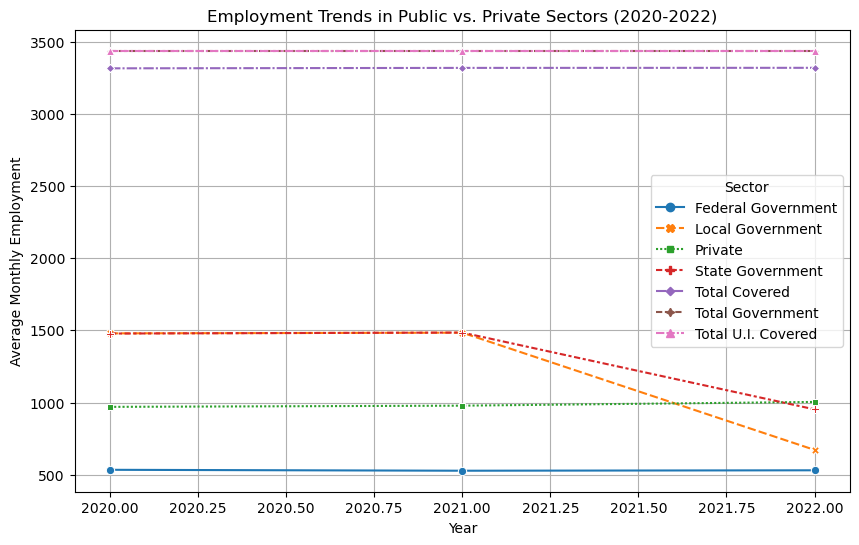

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by year and sector
sector_trends = df.groupby(['Year', 'Ownership']).agg({'Average Monthly Employment': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sector_trends, x='Year', y='Average Monthly Employment', hue='Ownership', style='Ownership', markers=True)
plt.title('Employment Trends in Public vs. Private Sectors (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Average Monthly Employment')
plt.legend(title='Sector')
plt.grid(True)
plt.show()

Employment Trends in Public vs. Private Sectors (2020-2022)
This line graph displays the employment trends from 2020 to 2022 in public versus private sectors. It helps to identify how different sectors have reacted to changes over the period, crucial for understanding economic resilience or vulnerability to fluctuations, addressing the first research question about employment changes.

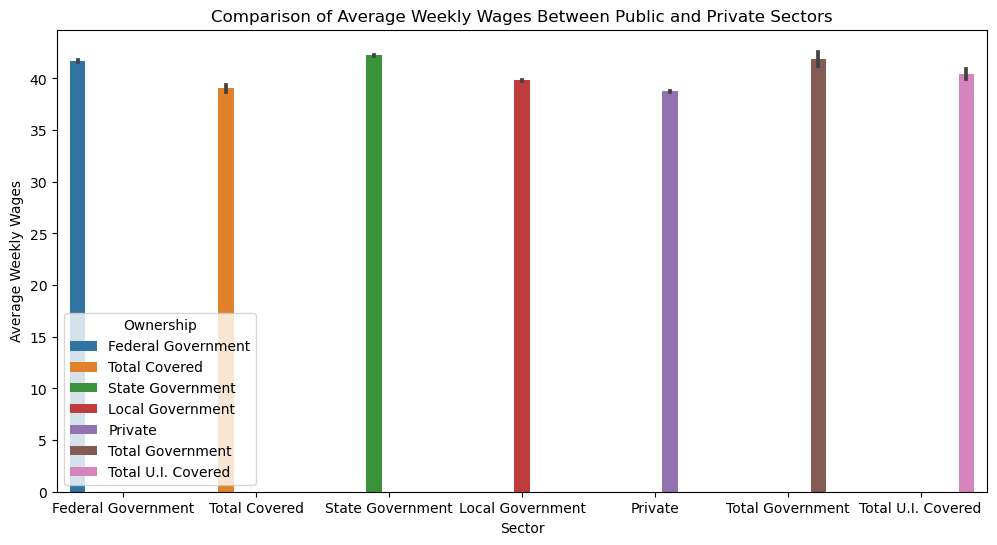

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ownership', y='Average Weekly Wages', hue='Ownership')
plt.title('Comparison of Average Weekly Wages Between Public and Private Sectors')
plt.xlabel('Sector')
plt.ylabel('Average Weekly Wages')
plt.show()

Comparison of Average Weekly Wages Between Public and Private Sectors
The bar chart shows wage disparities between public and private sectors. It directly relates to the second research question about salary patterns, indicating potential persistent wage gaps or sector-specific economic values.

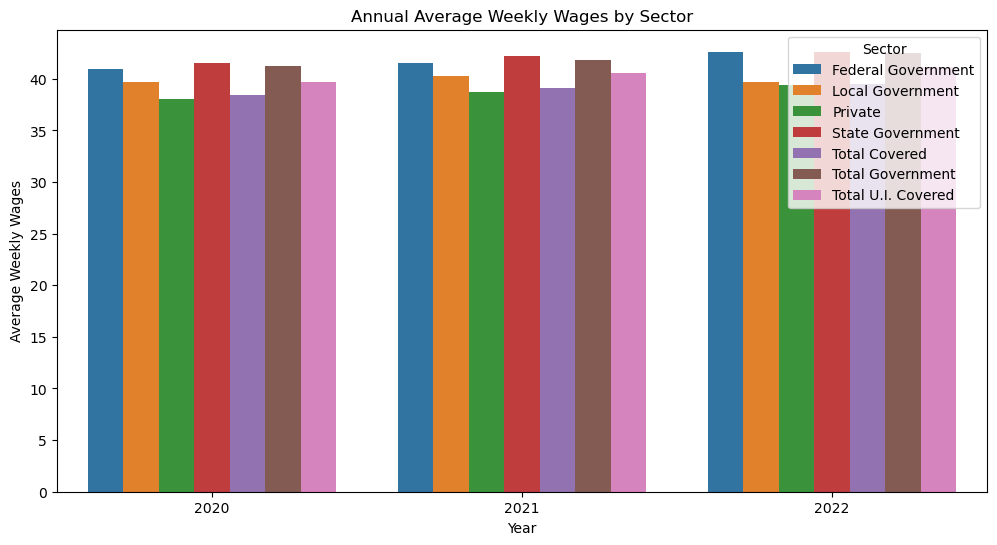

In [27]:
wage_comparison = df.groupby(['Year', 'Ownership']).agg({'Average Weekly Wages': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=wage_comparison, x='Year', y='Average Weekly Wages', hue='Ownership')
plt.title('Annual Average Weekly Wages by Sector')
plt.xlabel('Year')
plt.ylabel('Average Weekly Wages')
plt.legend(title='Sector')
plt.show()

Annual Average Weekly Wages by Sector
This bar chart breaks down average weekly wages by year, illustrating trends and changes in sectorial wage equality over time. This visualization aids in identifying significant economic or labor market shifts that impact wage structures, enriching the discussion on wage disparities across sectors.